In [65]:
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 
import numpy as np
import graphviz
from graphviz import Digraph
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [66]:
# learn a line segment

In [67]:
# generate data for a line segment [0.5, 1.5) (y=1) and 
# for points outside the line segent [1.5, 2.0] (y=0)

npts = 1000

X1 = np.zeros((npts,1))
y0 = np.zeros(npts)
y1 = np.zeros(npts)

for i in range(0,npts): 
    X1[i,0] = np.random.uniform(0.0,2.0)         
    if ((X1[i,0]<=0.5) or (X1[i,0]>1.5)):
        y1[i] = 0
    else:
        y1[i] = 1


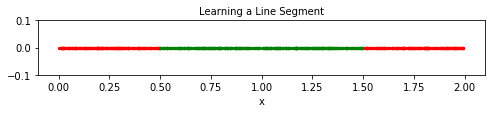

In [68]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 1))
plt.title('Learning a Line Segment', fontsize='medium')
plt.xlabel('x')
plt.ylabel('')
plt.scatter(x = X1[y1==0, 0], y=y0[y1==0], color='red', label='0', s=5)
plt.scatter(x = X1[y1==1, 0], y=y0[y1==1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,0.1)
plt.show()

In [69]:
# split data into 50% training and 50% test data

X1_train, X1_test, y1_train, y1_test = train_test_split(
         X1, y1, test_size=0.50, random_state=0)

if (npts==20):
    print(np.sort(X1_train.transpose()))

In [70]:
# Fit for various depth trees
MaxDepth = 4
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X1_train, y1_train)

    X1_combined = np.vstack((X1_train, X1_test))
    y1_combined = np.hstack((y1_train, y1_test))

    # optional outputs
    z = tree.apply(X1_combined)
    #print(z)
    dp = tree.decision_path(X1_combined)
    #print (dp)
    
    Errors[i,0] = 1 - tree.score(X1_train,y1_train)
    Errors[i,1] = 1 - tree.score(X1_test,y1_test)
    print(i+1,Errors[i,0],Errors[i,1])


Max Depth, Training, Test
1 0.246 0.28600000000000003
2 0.0 0.0040000000000000036
3 0.0 0.0040000000000000036
4 0.0 0.0040000000000000036


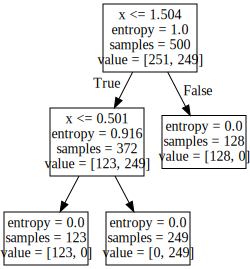

In [71]:
# plot the final decision gree
export_graphviz(tree, out_file='T1.dot', feature_names=['x'])
with open('T1.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [72]:
#
# If you want to generate a .png file of the image of the tree use the following steps:
# 1) Install GraphViz on your computer
# 2) Open a command prompt
# 3) Go to the directory in which the T1.dot file was stored 
#    when you ran the preceeding cell
#    It will probably be the same directory that this .ipynb file is in
# 4) Run the command:  dot -Tpng T1.dot -o T1.png
# 5) The image will be in the file T1.png
#

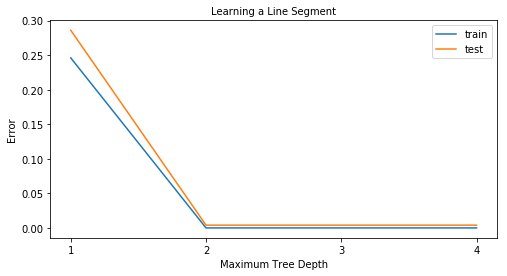

In [73]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning a Line Segment', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


In [74]:
# learn an axis-aligned rectangle

In [75]:
# generate data for an axis-aligned rectangle with vertex coordinates
# (0.5,0.5),(0.5,1.5),(1.5,0.5),(1.5,1.5) 
# for points inside the rectangle, y=1 and for points outside the rectangle, y=0.

npts = 10000

X2 = np.zeros((npts,2))
y2 = np.zeros(npts)

for i in range(0,npts): 
    X2[i,0] = np.random.uniform(0.0,2.0) 
    X2[i,1] = np.random.uniform(0.0,2.0) 
    if ((X2[i,0]<=0.5) or (X2[i,0]>1.5) or (X2[i,1]<=0.5) or (X2[i,1]>1.5)):
        y2[i] = 0
    else:
        y2[i] = 1
        

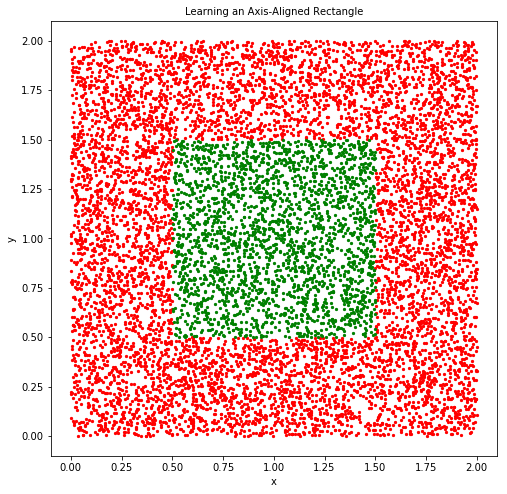

In [76]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning an Axis-Aligned Rectangle', fontsize='medium')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x = X2[y2==0, 0], y = X2[y2==0, 1], color='red', label='0', s=5)
plt.scatter(x = X2[y2==1, 0], y = X2[y2==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

In [77]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(
         X2, y2, test_size=0.50, random_state=0)


In [78]:
# Fit for various depth trees
MaxDepth = 5
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X2_train, y2_train)

    X2_combined = np.vstack((X2_train, X2_test))
    y2_combined = np.hstack((y2_train, y2_test))

    # optional outputs
    z = tree.apply(X2_combined)
    #print(z)
    dp = tree.decision_path(X2_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X2_train,y2_train)
    Errors[i,1] = 1 - tree.score(X2_test,y2_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.24580000000000002 0.2528
2 0.24580000000000002 0.2528
3 0.12080000000000002 0.11419999999999997
4 0.0 0.0006000000000000449
5 0.0 0.0006000000000000449


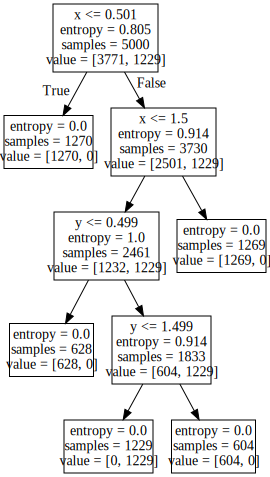

In [79]:
# plot the final decision gree
export_graphviz(tree, out_file='T2.dot', feature_names=['x','y'])
with open('T2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

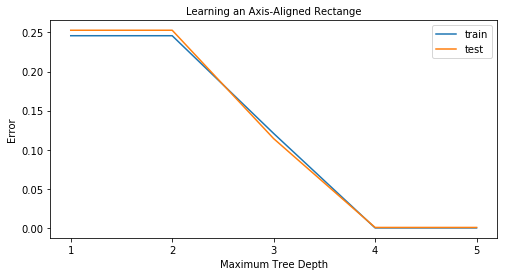

In [80]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Axis-Aligned Rectange', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


In [81]:
# learn an origin-aligned circle using x and y using only x and y as features

In [82]:
# generate data for an origin-centered circle centered with radius 0.5 

npts = 10000

X5 = np.zeros((npts,5))
y5 = np.zeros(npts)
#important
for i in range(0,npts): 
    X5[i,0] = np.random.uniform(-1.0,1.0) 
    X5[i,1] = np.random.uniform(-1.0,1.0) 
    if ((X5[i,0]**2+X5[i,1]**2) >= ((0.5)**2)):
        y5[i] = 0
    else:
        y5[i] = 1
  

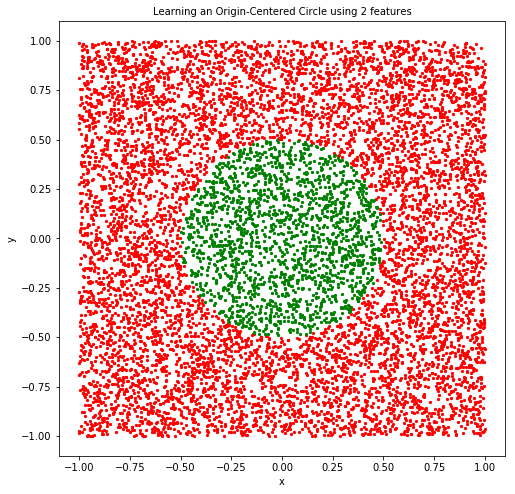

In [83]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning an Origin-Centered Circle using 2 features', fontsize='medium')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x = X5[y5==0, 0], y = X5[y5==0, 1], color='red', label='0', s=5)
plt.scatter(x = X5[y5==1, 0], y = X5[y5==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

In [84]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X5_train, X5_test, y5_train, y5_test = train_test_split(
         X5, y5, test_size=0.50, random_state=0)


In [85]:
# Fit for various depth trees
MaxDepth = 10
DotFileName ='T5.dot'
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X5_train, y5_train)

    X5_combined = np.vstack((X5_train, X5_test))
    y5_combined = np.hstack((y5_train, y5_test))

    # optional outputs
    z = tree.apply(X5_combined)
    #print(z)
    dp = tree.decision_path(X5_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X5_train,y5_train)
    Errors[i,1] = 1 - tree.score(X5_test,y5_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.18799999999999994 0.19399999999999995
2 0.18799999999999994 0.19399999999999995
3 0.1604 0.16879999999999995
4 0.040200000000000014 0.04359999999999997
5 0.040200000000000014 0.04359999999999997
6 0.033399999999999985 0.03920000000000001
7 0.020199999999999996 0.02939999999999998
8 0.013800000000000034 0.023399999999999976
9 0.007600000000000051 0.017199999999999993
10 0.005199999999999982 0.014599999999999946


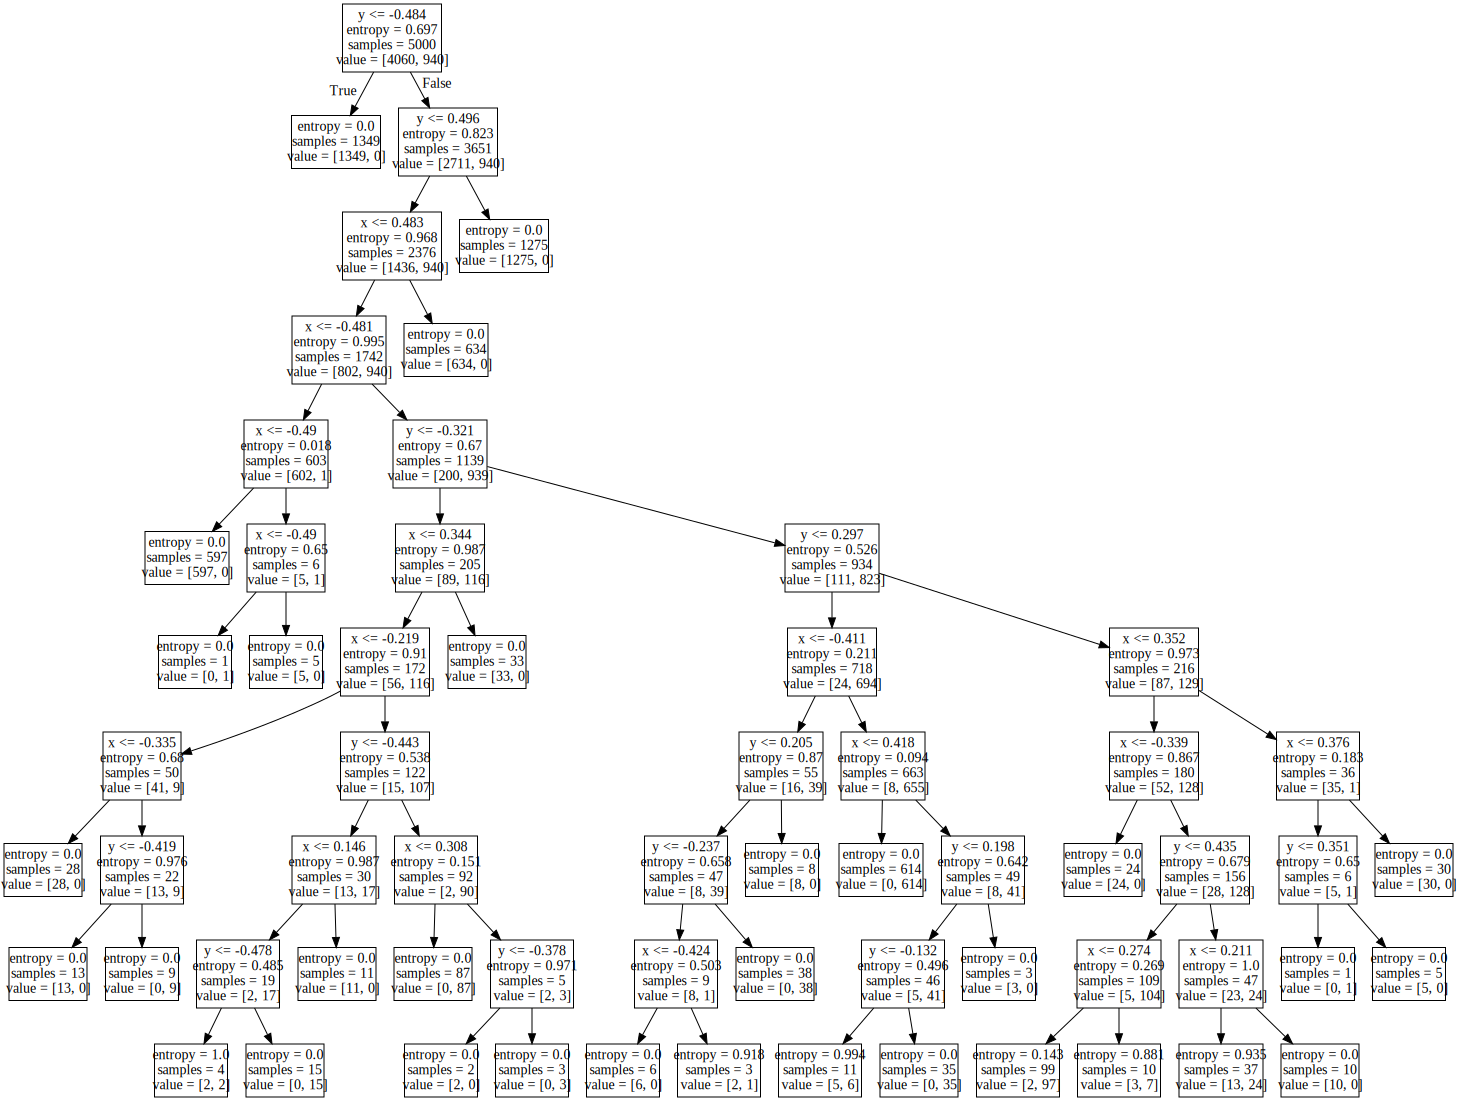

In [86]:
# plot the final decision gree
export_graphviz(tree, out_file='T5.dot', feature_names=['x','y','','',''])
with open('T5.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

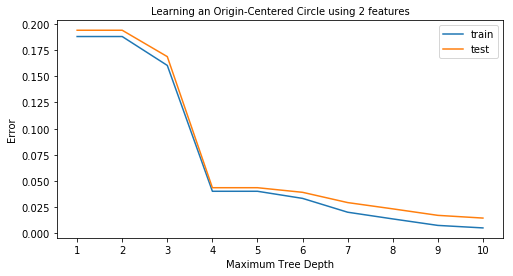

In [87]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Origin-Centered Circle using 2 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


In [88]:
# learn an origin-aligned circle using x, y, x**2, xy, y**2 as the features

In [89]:
# generate data for an circle centered at (1.0,1.0) with radius 0.5

npts = 10000

X5 = np.zeros((npts,5))
y5 = np.zeros(npts)

for i in range(0,npts): 
    X5[i,0] = np.random.uniform(-1.0,1.0) 
    X5[i,1] = np.random.uniform(-1.0,1.0)
    X5[i,2] = X5[i,0]**2
    X5[i,3] = X5[i,0]*X5[i,1]
    X5[i,4] = X5[i,1]**2
    
    
    if (((X5[i,0])**2+(X5[i,1])**2) >= 0.5):
        y5[i] = 0
    else:
        y5[i] = 1
  

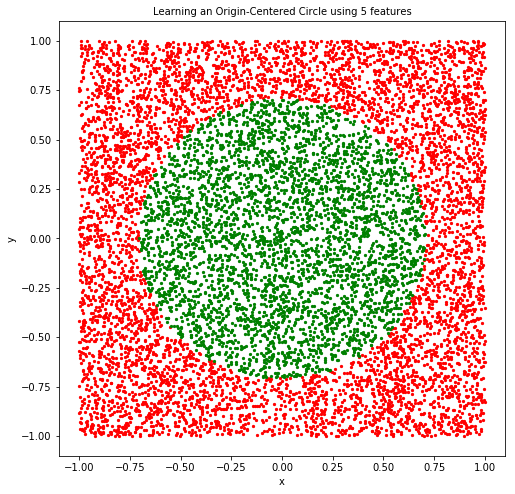

In [90]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning an Origin-Centered Circle using 5 features', fontsize='medium')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x = X5[y5==0, 0], y = X5[y5==0, 1], color='red', label='0', s=5)
plt.scatter(x = X5[y5==1, 0], y = X5[y5==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

In [91]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X5_train, X5_test, y5_train, y5_test = train_test_split(
         X5, y5, test_size=0.50, random_state=0)


In [92]:
# Fit for various depth trees
MaxDepth = 10
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X5_train, y5_train)

    X5_combined = np.vstack((X5_train, X5_test))
    y5_combined = np.hstack((y5_train, y5_test))

    # optional outputs
    z = tree.apply(X5_combined)
    #print(z)
    dp = tree.decision_path(X5_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X5_train,y5_train)
    Errors[i,1] = 1 - tree.score(X5_test,y5_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.2984 0.31179999999999997
2 0.0726 0.08919999999999995
3 0.07220000000000004 0.08919999999999995
4 0.02739999999999998 0.03359999999999996
5 0.026000000000000023 0.03200000000000003
6 0.008000000000000007 0.013800000000000034
7 0.007399999999999962 0.014599999999999946
8 0.0011999999999999789 0.008399999999999963
9 0.0008000000000000229 0.008399999999999963
10 0.0 0.008199999999999985


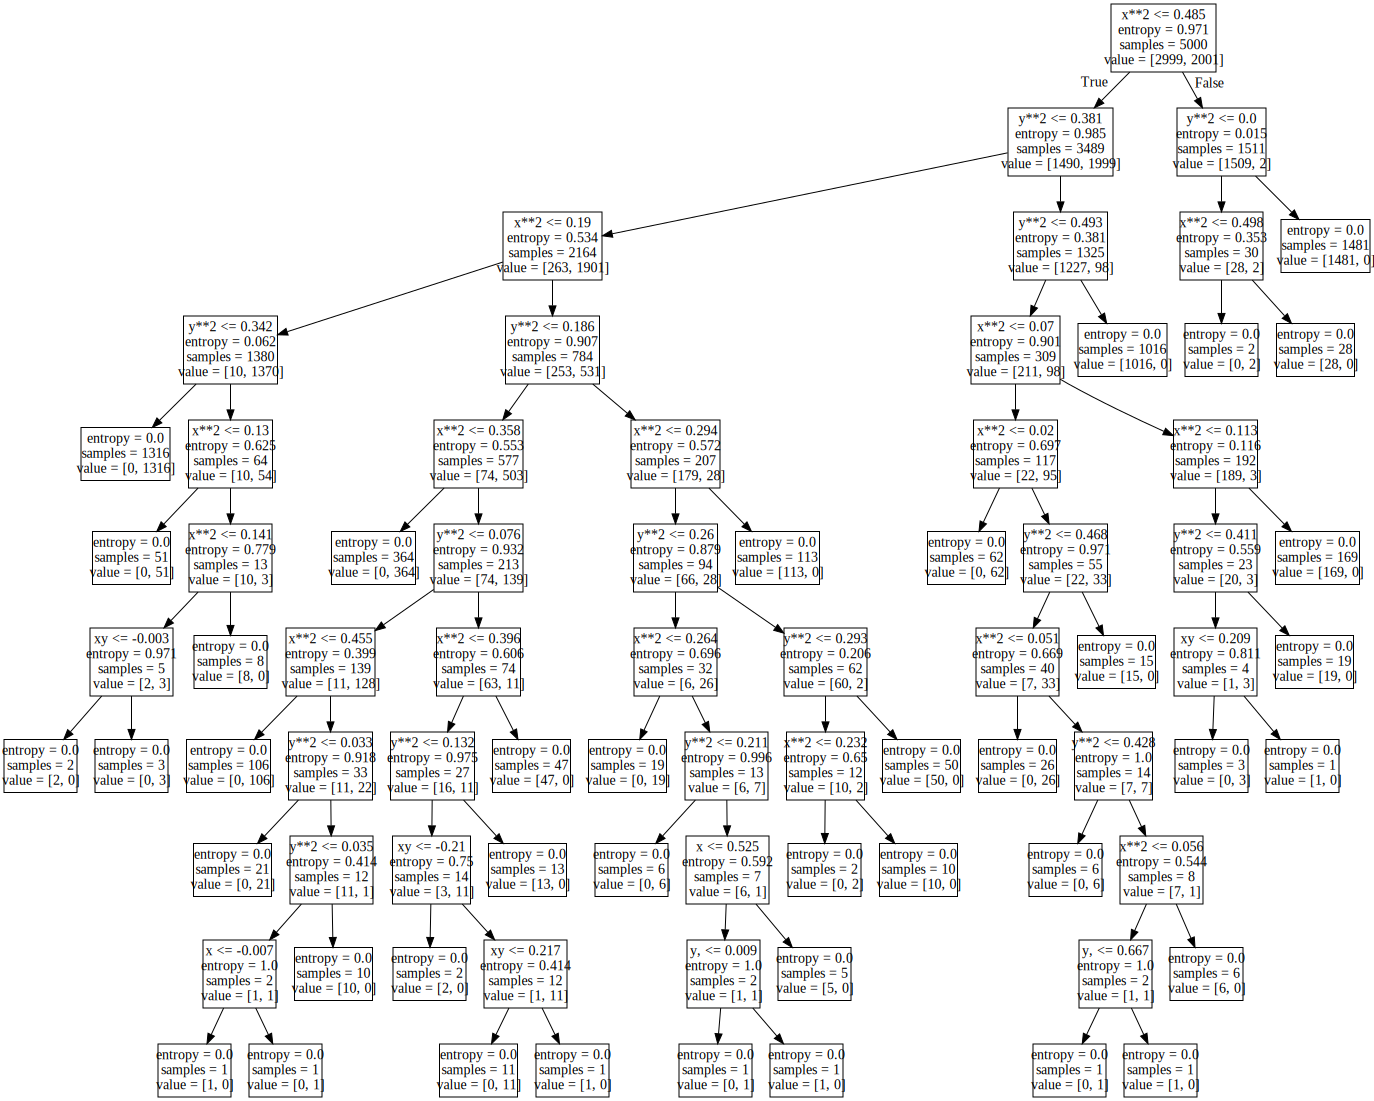

In [93]:
# plot the final decision gree
export_graphviz(tree, out_file='t5a.dot', feature_names=['x','y,','x**2','xy','y**2'])
with open('T5a.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

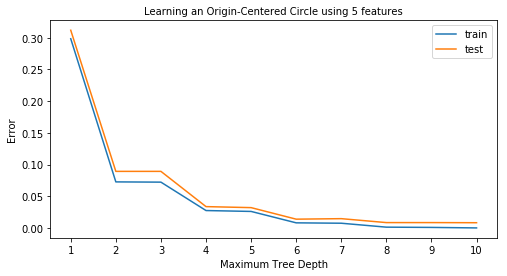

In [94]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Origin-Centered Circle using 5 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


In [95]:
# learn an origin-aligned circle using x, y, x**2, xy, y**2 AND (x**2+y**2) as feature

In [96]:
# generate data for an circle centered at (1.0,1.0) with radius 0.5

npts = 10000

X6 = np.zeros((npts,6))
y6 = np.zeros(npts)

for i in range(0,npts): 
    X6[i,0] = np.random.uniform(-1.0,1.0) 
    X6[i,1] = np.random.uniform(-1.0,1.0)
    X6[i,2] = X6[i,0]**2
    X6[i,3] = X6[i,0]*X5[i,1]
    X6[i,4] = X6[i,1]**2
    X6[i,5] = X6[i,0]**2+X6[i,1]**2
    
    
    
    if (((X6[i,0])**2+(X6[i,1])**2) >= 0.5):
        y6[i] = 0
    else:
        y6[i] = 1
  

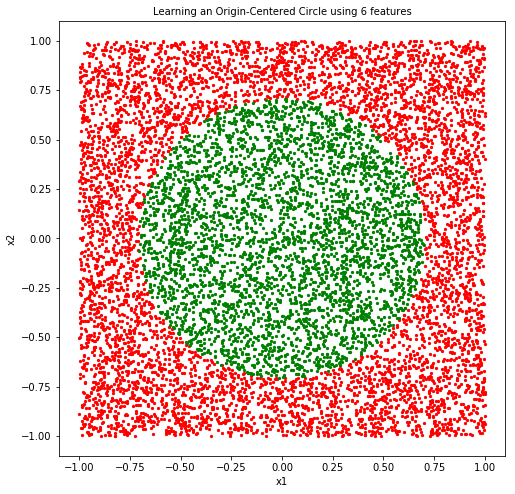

In [97]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning an Origin-Centered Circle using 6 features', fontsize='medium')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x = X6[y6==0, 0], y = X6[y6==0, 1], color='red', label='0', s=5)
plt.scatter(x = X6[y6==1, 0], y = X6[y6==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

In [98]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X6_train, X6_test, y6_train, y6_test = train_test_split(
         X6, y6, test_size=0.50, random_state=0)


In [99]:
# Fit for various depth trees
MaxDepth = 10
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X6_train, y6_train)

    X6_combined = np.vstack((X6_train, X6_test))
    y6_combined = np.hstack((y6_train, y6_test))

    # optional outputs
    z = tree.apply(X6_combined)
    #print(z)
    dp = tree.decision_path(X6_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X6_train,y6_train)
    Errors[i,1] = 1 - tree.score(X6_test,y6_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.0 0.0
2 0.0 0.0
3 0.0 0.0
4 0.0 0.0
5 0.0 0.0
6 0.0 0.0
7 0.0 0.0
8 0.0 0.0
9 0.0 0.0
10 0.0 0.0


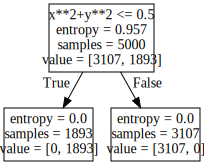

In [100]:
# plot the final decision gree
export_graphviz(tree, out_file='T6.dot', feature_names=['x','y,','x**2','xy','y**2','x**2+y**2'])
with open('T6.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

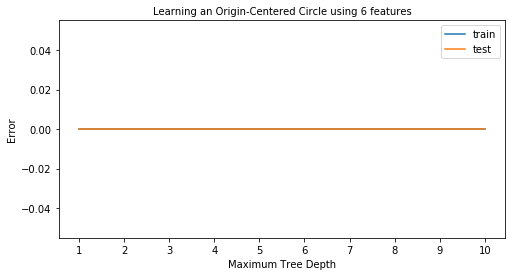

In [101]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Origin-Centered Circle using 6 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


In [102]:
#Learning a triangle 

In [214]:
# generate data for an axis-aligned rectangle with vertex coordinates
# (0.5,0.5),(0.5,1.5),(1.5,0.5),(1.5,1.5) 
# for points inside the rectangle, y=1 and for points outside the rectangle, y=0.
#(1,1) (0.5,1.75),(1.75,0.5)
npts = 10000

X_ = np.zeros((npts,4))
y_ = np.zeros(npts)

for i in range(0,npts): 
    X_[i,0] = np.random.uniform(0.0,2.0) 
    X_[i,1] = np.random.uniform(0.0,2.0)
    X_[i,2] = X_[i,0]+X_[i,1]#Part that let me make the line for the triangle 
    X_[i,3]
    # if ((X2[i,0]<=0.5) or (X2[i,0]>1.5) or (X2[i,1]<=0.5) or (X2[i,1]>1.5)):
    if ((X_[i,2]<=2) or (X_[i,1]>=2) or (X_[i,1]>=1.75) or (X_[i,0]>=1.75) ):
        y_[i] = 0
    else:
        y_[i] = 1
        
        


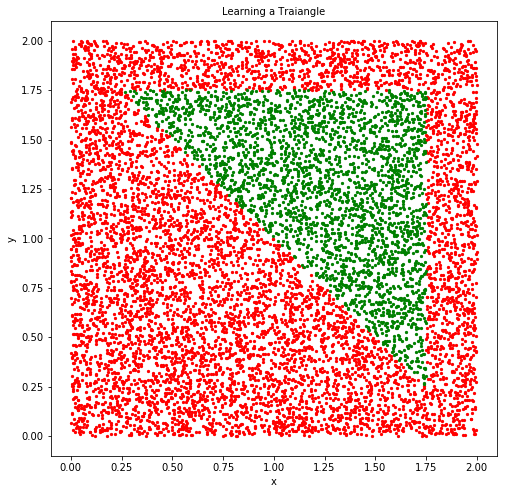

In [223]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning a Traiangle', fontsize='medium')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x = X_[y_==0, 0], y = X_[y_==0, 1], color='red', label='0', s=5)
plt.scatter(x = X_[y_==1, 0], y = X_[y_==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

In [216]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X_, y_, test_size=0.50, random_state=0)


In [226]:
# Fit for various depth trees
MaxDepth = 10
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X_train, y_train)

    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))

    # optional outputs
    z = tree.apply(X_combined)
    #print(z)
    dp = tree.decision_path(X_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X_train,y_train)
    Errors[i,1] = 1 - tree.score(X_test,y_test)
    print(i+1,Errors[i,0],Errors[i,1])


Max Depth, Training, Test
1 0.2238 0.20520000000000005
2 0.09760000000000002 0.09840000000000004
3 0.0 0.0011999999999999789
4 0.0 0.0011999999999999789
5 0.0 0.0011999999999999789
6 0.0 0.0011999999999999789
7 0.0 0.0011999999999999789
8 0.0 0.0011999999999999789
9 0.0 0.0011999999999999789
10 0.0 0.0011999999999999789


1.0


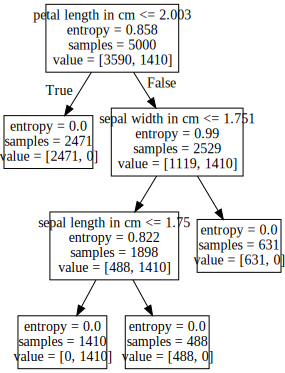

In [224]:
# plot the final decision gree
export_graphviz(tree, out_file='T6.dot', feature_names=['x','y','z','d'])
with open('T6.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Above I created learn a triangle. I follow the same process in with the other shapes. I was able to create the triangle and the tree. I found creating the triangle to be pretty challenging.